# Assignment 1

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# loading data

data_BAR = pd.read_csv('BAR_LowSP_6.5MW_234.csv')
data_IEA10 = pd.read_csv('IEA_10MW_198_RWT.csv')
data_IEA15 = pd.read_csv('IEA_15MW_240_RWT.csv')
data_wind = pd.read_csv('POWER_Point_Hourly_20240101_20241231_053d18N_0130d83W_LST.csv', skiprows=10)

### Part 1: The Wind Resource

In [25]:
data_wind.head()

,YEAR,MO,DY,HR,WS10M,WS50M
0,2024,1,1,0,6.52,7.16
1,2024,1,1,1,6.38,7.02
2,2024,1,1,2,6.14,6.75
3,2024,1,1,3,5.73,6.29
4,2024,1,1,4,5.28,5.80


In [26]:
u_avg = np.mean(data_wind['WS10M'])
print(f'Average wind speed at 10m: {u_avg:.2f} m/s')
u_std = np.std(data_wind['WS10M'])
print(f'Standard deviation of wind speed at 10m: {u_std:.2f} m/s')

Average wind speed at 10m: 6.49 m/s
Standard deviation of wind speed at 10m: 3.53 m/s


In [27]:
data_wind['WS10M']

0       6.52
1       6.38
2       6.14
3       5.73
4       5.28
        ... 
8779    9.08
8780    9.35
8781    9.49
8782    9.43
8783    9.37
Name: WS10M, Length: 8784, dtype: float64

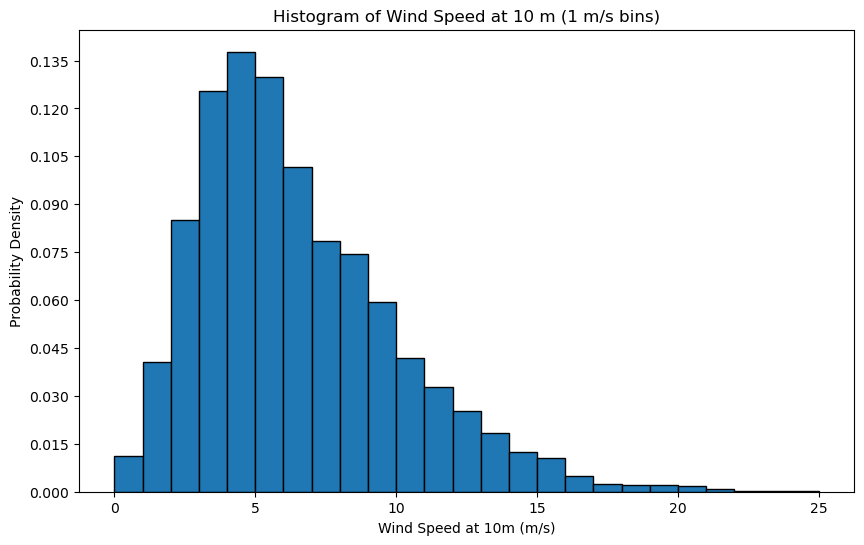

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(data_wind['WS10M'], bins=np.arange(0, data_wind['WS10M'].max() + 1, 1), edgecolor='black', density=True)
plt.xlabel('Wind Speed at 10m (m/s)')
plt.ylabel('Probability Density')
plt.title('Histogram of Wind Speed at 10 m (1 m/s bins)')
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

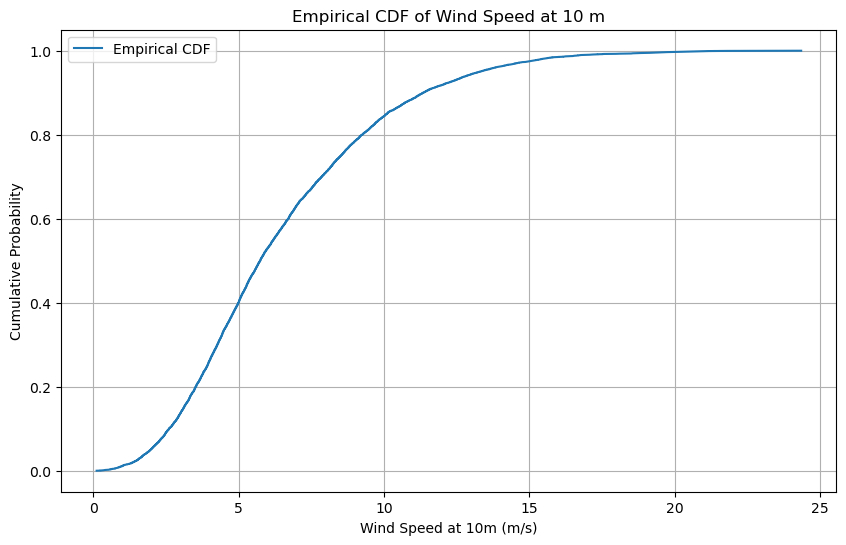

In [ ]:
# Compute and plot the empirical CDF of wind speed at 10m
ws_sorted = np.sort(data_wind['WS10M'])
cdf = np.arange(1, len(ws_sorted) + 1) / len(ws_sorted)

plt.figure(figsize=(10, 6))
plt.plot(ws_sorted, cdf, label='Empirical CDF')
plt.xlabel('Wind Speed at 10m (m/s)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of Wind Speed at 10 m')
plt.grid(True)
plt.legend()
plt.show()

Fitted coefficients: slope = 2.1295, intercept = -4.2209


C:\Users\aqdas\AppData\Local\Temp\ipykernel_26792\3789700573.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.log(-np.log(1 - cdf))


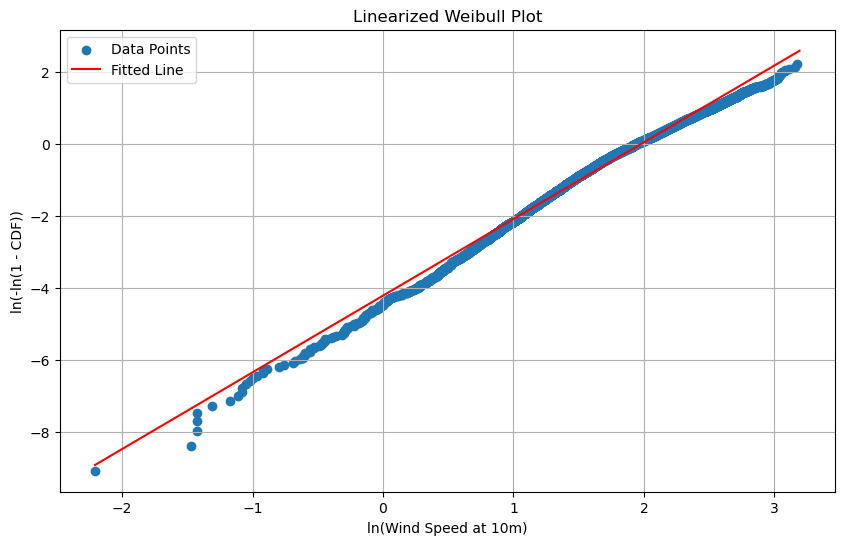

Weibull shape parameter (k): 2.1295
Weibull scale parameter (c): 7.2577
R^2 of the linear fit: 0.9905


In [48]:
from sklearn.metrics import r2_score

x = np.log(ws_sorted)
y = np.log(-np.log(1 - cdf))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points')
coeffs = np.polyfit(x[np.isfinite(y)], y[np.isfinite(y)], 1)
print(f'Fitted coefficients: slope = {coeffs[0]:.4f}, intercept = {coeffs[1]:.4f}')
plt.plot(x, np.polyval(coeffs, x), color='red', label='Fitted Line')
plt.xlabel('ln(Wind Speed at 10m)')
plt.ylabel('ln(-ln(1 - CDF))')
plt.title('Linearized Weibull Plot')
plt.grid(True)
plt.legend()
plt.show()

k = coeffs[0]
b = coeffs[1]
c = np.exp(-b / k)

print(f'Weibull shape parameter (k): {coeffs[0]:.4f}')
print(f'Weibull scale parameter (c): {c:.4f}')

# Only use finite values for R^2 calculation
mask = np.isfinite(y)
r2 = r2_score(y[mask], np.polyval(coeffs, x[mask]))
print(f'R^2 of the linear fit: {r2:.4f}')

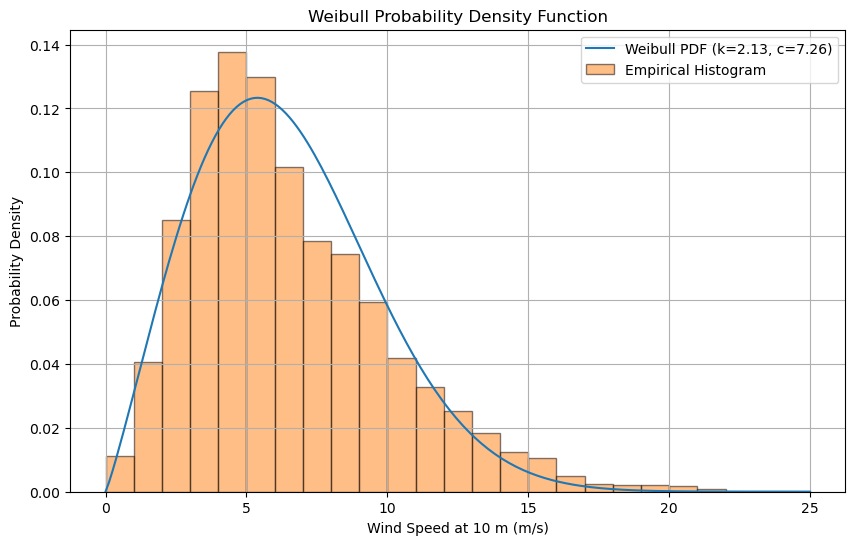

In [43]:
def weibull_pdf(x, k, c):
    """Weibull probability density function."""
    return (k / c) * (x / c) ** (k - 1) * np.exp(-(x / c) ** k)

# Example: plot Weibull PDF using estimated k and c
x_vals = np.linspace(0, 25, 200)
pdf_vals = weibull_pdf(x_vals, k, c)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, pdf_vals, label=f'Weibull PDF (k={k:.2f}, c={c:.2f})')
plt.hist(data_wind['WS10M'], bins=np.arange(0, data_wind['WS10M'].max() + 1, 1), density=True, alpha=0.5, edgecolor='black', label='Empirical Histogram')
plt.xlabel('Wind Speed at 10 m (m/s)')
plt.ylabel('Probability Density')
plt.title('Weibull Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

Fitted Weibull shape parameter (k): 1.9420
Fitted Weibull scale parameter (c): 7.3378


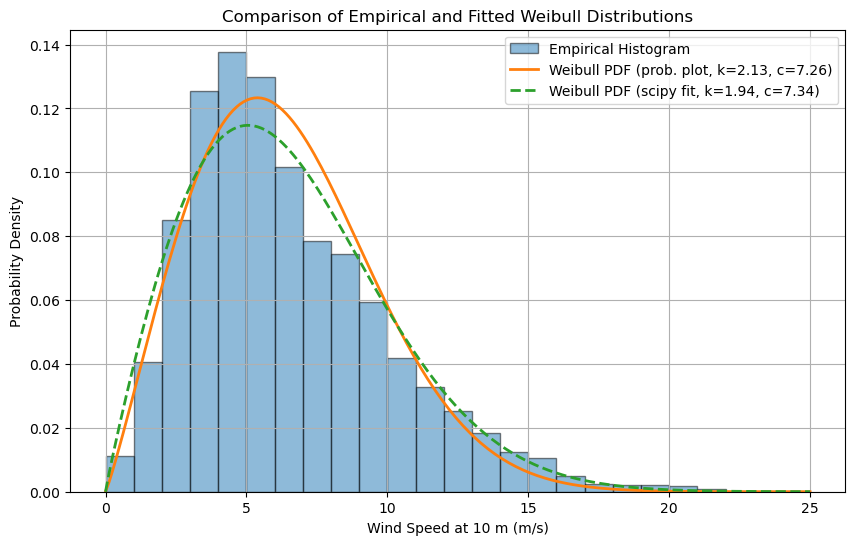

In [45]:
from scipy.stats import weibull_min

# Fit Weibull distribution to wind speed data using scipy
params = weibull_min.fit(data_wind['WS10M'], floc=0)
k_fit, loc_fit, c_fit = params
print(f"Fitted Weibull shape parameter (k): {k_fit:.4f}")
print(f"Fitted Weibull scale parameter (c): {c_fit:.4f}")

# Plot empirical histogram, Weibull fit (scipy), and Weibull fit (probability plot)
plt.figure(figsize=(10, 6))
plt.hist(data_wind['WS10M'], bins=np.arange(0, data_wind['WS10M'].max() + 1, 1), density=True, alpha=0.5, edgecolor='black', label='Empirical Histogram')

# Weibull PDF from probability plot fit
plt.plot(x_vals, pdf_vals, label=f'Weibull PDF (prob. plot, k={k:.2f}, c={c:.2f})', linewidth=2)

# Weibull PDF from scipy fit
pdf_fit = weibull_min.pdf(x_vals, k_fit, loc_fit, c_fit)
plt.plot(x_vals, pdf_fit, label=f'Weibull PDF (scipy fit, k={k_fit:.2f}, c={c_fit:.2f})', linestyle='--', linewidth=2)

plt.xlabel('Wind Speed at 10 m (m/s)')
plt.ylabel('Probability Density')
plt.title('Comparison of Empirical and Fitted Weibull Distributions')
plt.legend()
plt.grid(True)
plt.show()